# **df2 - New - Model-training**

# **Customer Feedback & Sentiment Dataset**

In [ ]:
########################################################################

In [ ]:
import pandas as pd

In [ ]:
df2=pd.read_csv('/content/new_real_df2_bert_embeded.csv')

In [ ]:
df2.head()

Unnamed: 0                                           Sentence Sentiment  \
0           0  The GeoSolutions technology will leverage Bene...  positive   
1           1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative   
2           2  For the last quarter of 2010 , Componenta 's n...  positive   
3           3  According to the Finnish-Russian Chamber of Co...   neutral   
4           4  The Swedish buyout firm has sold its remaining...   neutral   

                                      Cleaned_Review  \
0  geosolutions technology leverage benefon gps s...   
1                       esi lows bk real possibility   
2  last quarter 2010 componenta net sales doubled...   
3  according chamber commerce major construction ...   
4  swedish buyout firm sold remaining percent sta...   

                                      BERT_Embedding  
0  [-6.9515753  -1.8642232   0.90039194 -1.584456...  
1  [-6.37756252e+00 -1.02899456e+00 -1.66405845e+...  
2  [-7.5323906e+00  2.5363200e+00  1.0446013e+00 ...  
3  [-6.8794355  -1.48928     0.62784934  1.190275...  
4  [-8.075133    0.63730234  1.1385529   1.480966...

In [ ]:
df2.columns.values

array(['Unnamed: 0', 'Sentence', 'Sentiment', 'Cleaned_Review',
       'BERT_Embedding'], dtype=object)

In [ ]:
import numpy as np

feature = np.array([np.fromstring(embedding.strip("[]"), sep=" ") for embedding in df2['BERT_Embedding']])
target = df2['Sentiment']

In [ ]:
df2.shape

(5842, 5)

In [ ]:
feature.shape

(5842, 50)

In [ ]:
df2['Sentiment'].value_counts()

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

# **Target is Multiclass**

In [ ]:
import numpy as np

# Convert the embeddings into a 2D numpy array
X = feature  # Stacks the list of embeddings into a proper 2D array
y = target

# Now your features are properly shaped for RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest classifier
dec_classifier = DecisionTreeClassifier()
dec_classifier.fit(X_train, y_train)

# Predictions
y_pred = dec_classifier.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4833190761334474
Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.15      0.14       175
           1       0.59      0.57      0.58       622
           2       0.49      0.50      0.50       372

    accuracy                           0.48      1169
   macro avg       0.41      0.41      0.41      1169
weighted avg       0.49      0.48      0.49      1169



In [ ]:
import numpy as np

# Convert the embeddings into a 2D numpy array
X = feature  # Stacks the list of embeddings into a proper 2D array
y = target

# Now your features are properly shaped for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6150556030795552
Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.06      0.09       175
           1       0.64      0.81      0.72       622
           2       0.67      0.54      0.60       372

    accuracy                           0.62      1169
   macro avg       0.48      0.47      0.47      1169
weighted avg       0.58      0.62      0.59      1169



# **Compare to Synthetic Dataset - Real Dataset Get High Accuracy**

# **Accuracy is 61%**

# **Now am trying Balance Check**

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


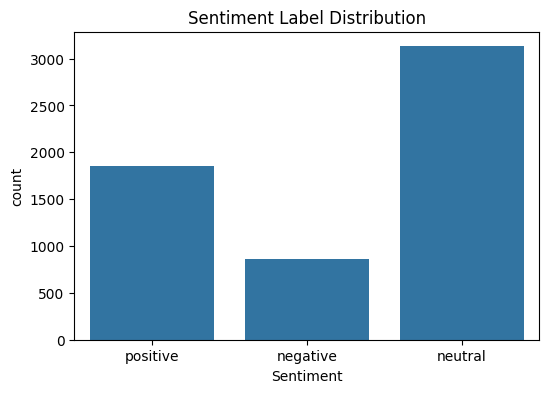

Dataset is IMBALANCED


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check value counts of the target column
value_counts = df2['Sentiment'].value_counts()
print(value_counts)

# Visualize the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=df2)
plt.title('Sentiment Label Distribution')
plt.show()

# Check balance status
max_count = value_counts.max()
min_count = value_counts.min()
threshold = 0.1  # 10% imbalance threshold

imbalance_ratio = (max_count - min_count) / max_count

if imbalance_ratio > threshold:
    print("Dataset is IMBALANCED")
else:
    print("Dataset is BALANCED")


# **Dataset Imbalanced so am using SMOTE Method**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Features and target
X = feature  # All BERT columns
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_train_smote))

# Now your dataset is balanced — ready for model training


Before SMOTE: Counter({'neutral': 2508, 'positive': 1480, 'negative': 685})
After SMOTE: Counter({'neutral': 2508, 'positive': 2508, 'negative': 2508})


Train Accuracy: 0.98
Test Accuracy: 0.61

Classification Report (Test Set):
               precision    recall  f1-score   support

    negative       0.24      0.25      0.25       175
     neutral       0.70      0.71      0.71       622
    positive       0.64      0.62      0.63       372

    accuracy                           0.61      1169
   macro avg       0.53      0.53      0.53      1169
weighted avg       0.61      0.61      0.61      1169



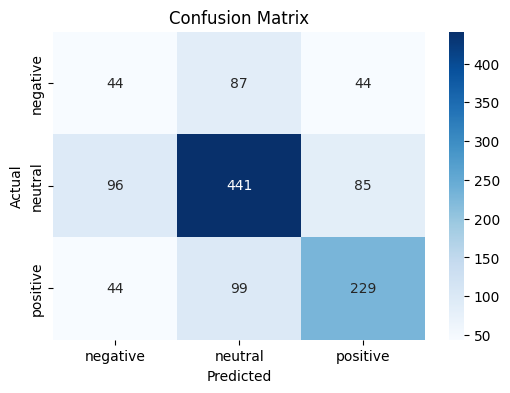


For class 'negative':
True Positives (TP): 44
False Positives (FP): 140
False Negatives (FN): 131
True Negatives (TN): 854

For class 'neutral':
True Positives (TP): 441
False Positives (FP): 186
False Negatives (FN): 181
True Negatives (TN): 361

For class 'positive':
True Positives (TP): 229
False Positives (FP): 129
False Negatives (FN): 143
True Negatives (TN): 668

🚨 Model is OVERFITTING: High training accuracy, lower test accuracy.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Convert the embeddings into a 2D numpy array
X = feature  # Stacks the list of embeddings into a proper 2D array
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_test = rf_classifier.predict(X_test)
y_pred_train = rf_classifier.predict(X_train_smote)

# Accuracy
train_accuracy = accuracy_score(y_train_smote, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extracting TP, FP, TN, FN for each class
labels = np.unique(y)
for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    print(f"\nFor class '{label}':")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# Determining if the model is overfitting, underfitting, or generalizing well
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("\n🚨 Model is OVERFITTING: High training accuracy, lower test accuracy.")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("\n⚠️ Model is UNDERFITTING: Both training and test accuracy are low.")
else:
    print("\n✅ Model is GENERALIZING WELL: Training and test accuracy are close and reasonably high.")


In [ ]:
df2.head()

Unnamed: 0                                           Sentence Sentiment  \
0           0  The GeoSolutions technology will leverage Bene...  positive   
1           1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative   
2           2  For the last quarter of 2010 , Componenta 's n...  positive   
3           3  According to the Finnish-Russian Chamber of Co...   neutral   
4           4  The Swedish buyout firm has sold its remaining...   neutral   

                                      Cleaned_Review  \
0  geosolutions technology leverage benefon gps s...   
1                       esi lows bk real possibility   
2  last quarter 2010 componenta net sales doubled...   
3  according chamber commerce major construction ...   
4  swedish buyout firm sold remaining percent sta...   

                                      BERT_Embedding  
0  [-6.9515753  -1.8642232   0.90039194 -1.584456...  
1  [-6.37756252e+00 -1.02899456e+00 -1.66405845e+...  
2  [-7.5323906e+00  2.5363200e+00  1.0446013e+00 ...  
3  [-6.8794355  -1.48928     0.62784934  1.190275...  
4  [-8.075133    0.63730234  1.1385529   1.480966...

**Train Accuracy: 0.98**

**Test Accuracy: 0.61**

#**After Using SMOTE No Changes was Happen**

# **Using Hyperparameter Tuning No Difference**

Train Accuracy: 0.96
Test Accuracy: 0.63

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.27      0.29      0.28       175
           1       0.71      0.73      0.72       622
           2       0.67      0.62      0.64       372

    accuracy                           0.63      1169
   macro avg       0.55      0.54      0.55      1169
weighted avg       0.63      0.63      0.63      1169



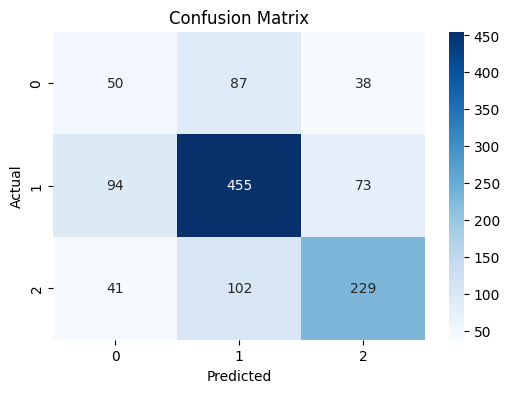


For class '0':
True Positives (TP): 50
False Positives (FP): 135
False Negatives (FN): 125
True Negatives (TN): 859

For class '1':
True Positives (TP): 455
False Positives (FP): 189
False Negatives (FN): 167
True Negatives (TN): 358

For class '2':
True Positives (TP): 229
False Positives (FP): 111
False Negatives (FN): 143
True Negatives (TN): 686

🚨 Model is OVERFITTING: High training accuracy, lower test accuracy.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Convert the embeddings into a 2D numpy array
X = feature  # Stacks the list of embeddings into a proper 2D array
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# RandomForest classifier
rf_classifier = RandomForestClassifier(criterion='gini',max_depth=None,max_features='log2',min_samples_leaf=1, min_samples_split=10,n_estimators=100, random_state=42)
rf_classifier.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_test = rf_classifier.predict(X_test)
y_pred_train = rf_classifier.predict(X_train_smote)

# Accuracy
train_accuracy = accuracy_score(y_train_smote, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extracting TP, FP, TN, FN for each class
labels = np.unique(y)
for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    print(f"\nFor class '{label}':")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# Determining if the model is overfitting, underfitting, or generalizing well
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("\n🚨 Model is OVERFITTING: High training accuracy, lower test accuracy.")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("\n⚠️ Model is UNDERFITTING: Both training and test accuracy are low.")
else:
    print("\n✅ Model is GENERALIZING WELL: Training and test accuracy are close and reasonably high.")


# **After Using HyperParameter Tuning - Accuracy not Increased**

# **2) Now XG Boosting**

**XG Boost work only if target is numeric**

In [ ]:
sentiment_mapping = {
    'negative': 0,
    'neutral': 1,
    'positive': 2
}

df2['Sentiment'] = df2['Sentiment'].map(sentiment_mapping)
print(df2['Sentiment'].head())  # To check if mapping worked


0    2
1    0
2    2
3    1
4    1
Name: Sentiment, dtype: int64


In [ ]:
df2.head()

Unnamed: 0                                           Sentence  Sentiment  \
0           0  The GeoSolutions technology will leverage Bene...          2   
1           1  $ESI on lows, down $1.50 to $2.50 BK a real po...          0   
2           2  For the last quarter of 2010 , Componenta 's n...          2   
3           3  According to the Finnish-Russian Chamber of Co...          1   
4           4  The Swedish buyout firm has sold its remaining...          1   

                                      Cleaned_Review  \
0  geosolutions technology leverage benefon gps s...   
1                       esi lows bk real possibility   
2  last quarter 2010 componenta net sales doubled...   
3  according chamber commerce major construction ...   
4  swedish buyout firm sold remaining percent sta...   

                                      BERT_Embedding  
0  [-6.9515753  -1.8642232   0.90039194 -1.584456...  
1  [-6.37756252e+00 -1.02899456e+00 -1.66405845e+...  
2  [-7.5323906e+00  2.5363200e+00  1.0446013e+00 ...  
3  [-6.8794355  -1.48928     0.62784934  1.190275...  
4  [-8.075133    0.63730234  1.1385529   1.480966...

Train Accuracy: 0.94
Test Accuracy: 0.62

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.27      0.33      0.30       175
           1       0.72      0.70      0.71       622
           2       0.66      0.62      0.64       372

    accuracy                           0.62      1169
   macro avg       0.55      0.55      0.55      1169
weighted avg       0.63      0.62      0.62      1169



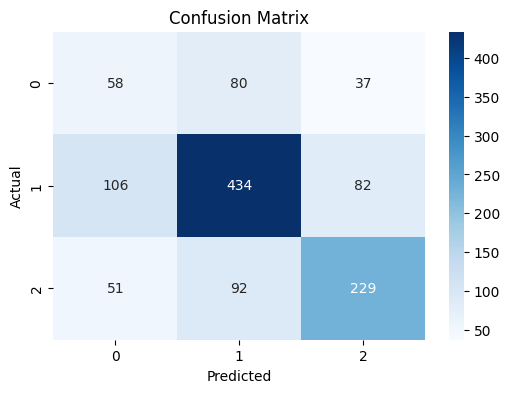


For class '0':
True Positives (TP): 58
False Positives (FP): 157
False Negatives (FN): 117
True Negatives (TN): 837

For class '1':
True Positives (TP): 434
False Positives (FP): 172
False Negatives (FN): 188
True Negatives (TN): 375

For class '2':
True Positives (TP): 229
False Positives (FP): 119
False Negatives (FN): 143
True Negatives (TN): 678

🚨 Model is OVERFITTING: High training accuracy, lower test accuracy.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Convert the embeddings into a 2D numpy array
X = feature  # Stacks the list of embeddings into a proper 2D array
y = df2['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_classifier.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_test = xgb_classifier.predict(X_test)
y_pred_train = xgb_classifier.predict(X_train_smote)

# Accuracy
train_accuracy = accuracy_score(y_train_smote, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extracting TP, FP, TN, FN for each class
labels = np.unique(y)
for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    print(f"\nFor class '{label}':")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

# Determining if the model is overfitting, underfitting, or generalizing well
if train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("\n🚨 Model is OVERFITTING: High training accuracy, lower test accuracy.")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("\n⚠️ Model is UNDERFITTING: Both training and test accuracy are low.")
else:
    print("\n✅ Model is GENERALIZING WELL: Training and test accuracy are close and reasonably high.")


# **Accuracy Struggling to Increase**

# **Now Using Navie Bayes Classifer - Specialized for Text Data**

Train Accuracy: 0.65
Test Accuracy: 0.66

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.42      0.39      0.40       175
           1       0.74      0.78      0.76       622
           2       0.61      0.58      0.59       372

    accuracy                           0.66      1169
   macro avg       0.59      0.58      0.59      1169
weighted avg       0.65      0.66      0.65      1169



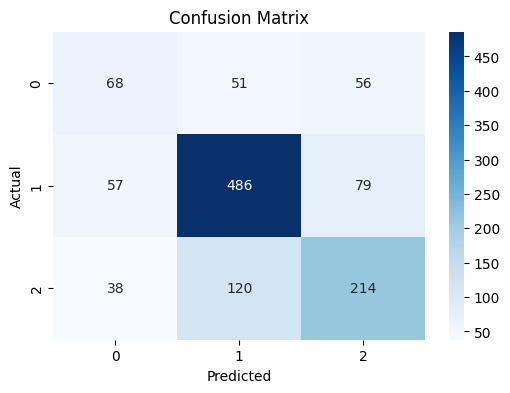

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X, y)

# Predictions
y_pred_test = nb_classifier.predict(X_test)
y_pred_train = nb_classifier.predict(X_train)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_pred_test))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Train Accuracy: 0.65**

**Test Accuracy: 0.66**

# **Model is Generalized but Accuracy was Low**

In [ ]:
#######################################################################

# **Neural Network - FNN**

#**FeedForward Neural Network (FNN) also known as a Multi-Layer Perceptron (MLP)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(50,)),  # 50 components from SVD
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 sentiment classes: Positive, Neutral, Negative
])

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4878 - loss: 1.0198 - val_accuracy: 0.6510 - val_loss: 0.8055
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5964 - loss: 0.8476 - val_accuracy: 0.6672 - val_loss: 0.7386
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6486 - loss: 0.7728 - val_accuracy: 0.6749 - val_loss: 0.7080
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6563 - loss: 0.7441 - val_accuracy: 0.6843 - val_loss: 0.6967
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6722 - loss: 0.7172 - val_accuracy: 0.6792 - val_loss: 0.6964
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6768 - loss: 0.7086 - val_accuracy: 0.6946 - val_loss: 0.6825
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6753 - loss: 0.6932 - val_accuracy: 0.6938 - val_loss: 0.6735
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7027 - loss: 0.6732 - val_accuracy: 0.6878 - val_

In [ ]:
df = pd.read_csv('/content/new_real_df2_bert.csv')

ParserError: Error tokenizing data. C error: Expected 5 fields in line 10538, saw 194


In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load the dataset (Assuming BERT embeddings are already extracted)
df = pd.read_csv('/content/new_real_df2_bert.csv')  # Replace with your actual dataset

# Convert embeddings (stored as strings) to NumPy arrays
df['BERT_Embedding'] = df['BERT_Embedding'].apply(lambda x: np.array(eval(x)))

# Extract features (BERT Embeddings) and labels (Sentiment_Label)
X = np.stack(df['BERT_Embedding'].values).astype(np.float32)  # Ensure it's float32

# Convert text labels to integers safely
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['Sentiment'] = df['Sentiment'].map(label_mapping)
df['Sentiment'].fillna(-1, inplace=True)  # Handle unmapped values
df = df[df['Sentiment'] != -1]  # Remove rows with invalid labels

y = df['Sentiment'].values.astype(np.int32)  # Convert labels to int


# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Neural Network (MLP)
model = Sequential([
    Dense(1024, activation='relu', input_shape=(768,)),  # Input layer (BERT embeddings)
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Output layer (3 sentiment classes)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train,
          epochs=40, batch_size=32,
          validation_data=(X_test, y_test),
          verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/40


<ipython-input-57-c4cebb594ede>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sentiment'].fillna(-1, inplace=True)  # Handle unmapped values
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5575 - loss: 0.9414 - val_accuracy: 0.6561 - val_loss: 0.7411
Epoch 2/40
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6468 - loss: 0.7762 - val_accuracy: 0.6715 - val_loss: 0.6899
Epoch 3/40
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6790 - loss: 0.7144 - val_accuracy: 0.6758 - val_loss: 0.6691
Epoch 4/40
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6951 - loss: 0.6623 - val_accuracy: 0.6980 - val_loss: 0.6484
Epoch 5/40
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7138 - loss: 0.6391 - val_accuracy: 0.7015 - val_loss: 0.6344
Epoch 6/40
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7314 - loss: 0.6045 - val_accuracy: 0.6997 - val_loss: 0.6449
Epoch 7/40
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7238 - loss: 0.6080 - val_accuracy: 0.6766 - val_loss: 0.6620
Epoch 8/40
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7426 - loss: 0.5737 - val_accuracy: 0.698

# **To Prevent Overfit**

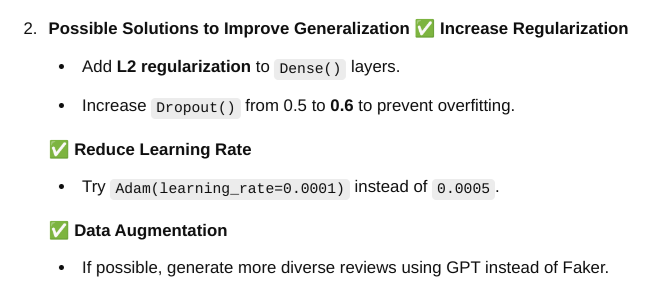

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2

# Load the dataset (Assuming BERT embeddings are already extracted)
df = pd.read_csv('/content/new_real_df2_bert.csv')  # Replace with your actual dataset

# Convert embeddings (stored as strings) to NumPy arrays
df['BERT_Embedding'] = df['BERT_Embedding'].apply(lambda x: np.array(eval(x)))

# Extract features (BERT Embeddings) and labels (Sentiment_Label)
X = np.stack(df['BERT_Embedding'].values).astype(np.float32)  # Ensure it's float32

# Convert text labels to integers safely
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['Sentiment'] = df['Sentiment'].map(label_mapping)
df['Sentiment'].fillna(-1, inplace=True)  # Handle unmapped values
df = df[df['Sentiment'] != -1]  # Remove rows with invalid labels

y = df['Sentiment'].values.astype(np.int32)  # Convert labels to int


# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(768,)),
    Dropout(0.6),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.6),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train,
          epochs=20, batch_size=32,
          validation_data=(X_test, y_test),
          verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/20


<ipython-input-50-ff33f7ecfb88>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sentiment'].fillna(-1, inplace=True)  # Handle unmapped values
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.4470 - loss: 2.0410 - val_accuracy: 0.5577 - val_loss: 1.7948
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5378 - loss: 1.8285 - val_accuracy: 0.6202 - val_loss: 1.6904
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5852 - loss: 1.7346 - val_accuracy: 0.6356 - val_loss: 1.6135
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6121 - loss: 1.6518 - val_accuracy: 0.6553 - val_loss: 1.5529
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6283 - loss: 1.5735 - val_accuracy: 0.6681 - val_loss: 1.5000
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6335 - loss: 1.5433 - val_accuracy: 0.6741 - val_loss: 1.4541
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6451 - loss: 1.4795 - val_accuracy: 0.6826 - val_loss: 1.4114
Epoch 8/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6586 - loss: 1.4485 - val_accuracy: 0.682

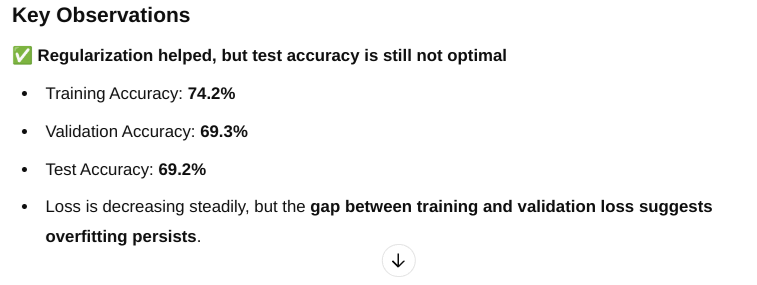

In [ ]:
df.shape

NameError: name 'df' is not defined

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/new_real_df2_bert.csv')  # Replace with actual file path

# Convert BERT embeddings (stored as strings) to NumPy arrays
df['BERT_Embedding'] = df['BERT_Embedding'].apply(lambda x: np.array(eval(x)))

# Map sentiment labels to integers
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['Sentiment'] = df['Sentiment'].map(label_mapping)

# Drop any invalid sentiment values
df = df.dropna(subset=['Sentiment'])
df['Sentiment'] = df['Sentiment'].astype(int)

# Extract features and labels
X = np.stack(df['BERT_Embedding'].values).astype(np.float32)
y = df['Sentiment'].values.astype(np.int32)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Learning rate scheduling
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0005, decay_steps=1000, decay_rate=0.96, staircase=True
)

# Define Neural Network with Regularization and Dropout
model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(0.001), input_shape=(768,)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile model with learning rate scheduler
model.compile(optimizer=Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=25, batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5288 - loss: 1.5150 - val_accuracy: 0.6347 - val_loss: 1.2445
Epoch 2/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6339 - loss: 1.2581 - val_accuracy: 0.6630 - val_loss: 1.1311
Epoch 3/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6425 - loss: 1.1479 - val_accuracy: 0.6578 - val_loss: 1.0646
Epoch 4/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6680 - loss: 1.0735 - val_accuracy: 0.6835 - val_loss: 0.9883
Epoch 5/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6920 - loss: 0.9801 - val_accuracy: 0.6818 - val_loss: 0.9576
Epoch 6/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6932 - loss: 0.9639 - val_accuracy: 0.6997 - val_loss: 0.9170
Epoch 7/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7125 - loss: 0.8946 - val_accuracy: 0.6689 - val_loss: 0.9372
Epoch 8/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7054 - loss: 0.8965 - val_accuracy: 0.6980 - va

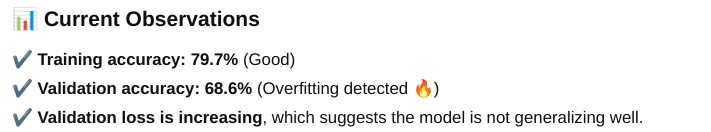

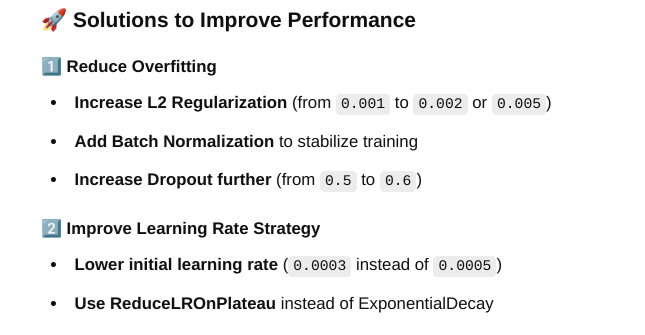

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/new_real_df2_bert.csv')  # Replace with actual file path

# Convert BERT embeddings (stored as strings) to NumPy arrays
df['BERT_Embedding'] = df['BERT_Embedding'].apply(lambda x: np.array(eval(x)))

# Map sentiment labels to integers
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['Sentiment'] = df['Sentiment'].map(label_mapping)

# Drop any invalid sentiment values
df = df.dropna(subset=['Sentiment'])
df['Sentiment'] = df['Sentiment'].astype(int)

# Extract features and labels
X = np.stack(df['BERT_Embedding'].values).astype(np.float32)
y = df['Sentiment'].values.astype(np.int32)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define learning rate scheduler (ReduceLROnPlateau)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Define Neural Network with Regularization, BatchNorm & Dropout
model = Sequential([
    Dense(256, activation='relu', kernel_regularizer=l2(0.002), input_shape=(768,)),
    BatchNormalization(),
    Dropout(0.6),

    Dense(128, activation='relu', kernel_regularizer=l2(0.002)),
    BatchNormalization(),
    Dropout(0.6),

    Dense(3, activation='softmax')
])

# Compile model with improved learning rate
model.compile(optimizer=Adam(learning_rate=0.0003),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=30, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler], verbose=1)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3795 - loss: 3.0836 - val_accuracy: 0.5047 - val_loss: 2.0423 - learning_rate: 3.0000e-04
Epoch 2/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5067 - loss: 2.4767 - val_accuracy: 0.6099 - val_loss: 1.9227 - learning_rate: 3.0000e-04
Epoch 3/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5427 - loss: 2.3251 - val_accuracy: 0.6664 - val_loss: 1.8198 - learning_rate: 3.0000e-04
Epoch 4/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5643 - loss: 2.1669 - val_accuracy: 0.6707 - val_loss: 1.7684 - learning_rate: 3.0000e-04
Epoch 5/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6004 - loss: 2.0167 - val_accuracy: 0.6724 - val_loss: 1.7319 - learning_rate: 3.0000e-04
Epoch 6/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6203 - loss: 1.9604 - val_accuracy: 0.6843 - val_loss: 1.6912 - learning_rate: 3.0000e-04
Epoch 7/30
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6254 -

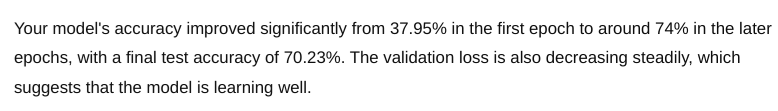

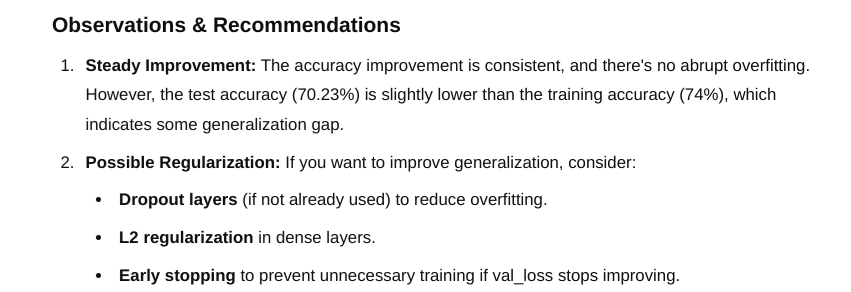

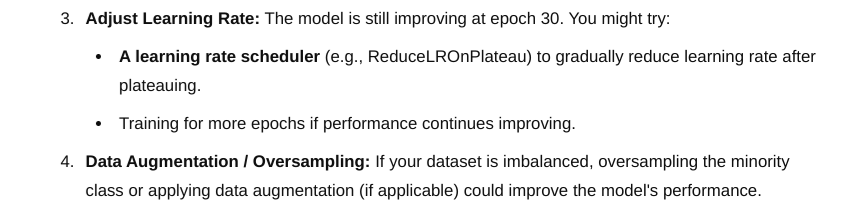

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the dataset
df = pd.read_csv('/content/new_real_df2_bert.csv')  # Replace with actual file path

# Convert BERT embeddings (stored as strings) to NumPy arrays
df['BERT_Embedding'] = df['BERT_Embedding'].apply(lambda x: np.array(eval(x)))

# Map sentiment labels to integers
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['Sentiment'] = df['Sentiment'].map(label_mapping)

# Drop any invalid sentiment values
df = df.dropna(subset=['Sentiment'])
df['Sentiment'] = df['Sentiment'].astype(int)

# Extract features and labels
X = np.stack(df['BERT_Embedding'].values).astype(np.float32)
y = df['Sentiment'].values.astype(np.int32)

# One-hot encode labels for categorical crossentropy
y = to_categorical(y, num_classes=3)

# Split the data into training (70%), validation (15%), and test (15%) sets
train_data, temp_data, train_labels, temp_labels = train_test_split(X, y, test_size=0.3, random_state=42)
val_data, test_data, val_labels, test_labels = train_test_split(temp_data, temp_labels, test_size=0.5, random_state=42)

# Get input and output dimensions
input_dim = train_data.shape[1]  # Number of features
output_dim = train_labels.shape[1]  # Number of classes (for categorical labels)

# Define model
model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(output_dim, activation='softmax')  # Output layer
])

# Compile model
optimizer = keras.optimizers.Adam(learning_rate=0.003)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(
    train_data, train_labels,
    validation_data=(val_data, val_labels),
    epochs=50,
    batch_size=32,
    callbacks=[lr_scheduler, early_stopping]
)

# Evaluate model
loss, accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5398 - loss: 2.2376 - val_accuracy: 0.6450 - val_loss: 0.9537 - learning_rate: 0.0030
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6189 - loss: 0.9553 - val_accuracy: 0.6473 - val_loss: 0.8895 - learning_rate: 0.0030
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6222 - loss: 0.9260 - val_accuracy: 0.6530 - val_loss: 0.8553 - learning_rate: 0.0030
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6356 - loss: 0.8947 - val_accuracy: 0.6130 - val_loss: 0.8958 - learning_rate: 0.0030
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6399 - loss: 0.8747 - val_accuracy: 0.6062 - val_loss: 0.9209 - learning_rate: 0.0030
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6542 - loss: 0.8705 - val_accuracy: 0.6689 - val_loss: 0.8337 - learning_rate: 0.0030
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6313 - loss: 0.8825 - 

In [ ]:
print(f"Input shape: {X.shape}")  # Should be (num_samples, 768) or (num_samples, 50)

Input shape: (5842, 768)


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/new_real_df2_bert.csv')  # Update path if needed

# Convert BERT embeddings (stored as strings) to NumPy arrays
df['BERT_Embedding'] = df['BERT_Embedding'].apply(lambda x: np.array(eval(x)))

# Map sentiment labels to integers
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['Sentiment'] = df['Sentiment'].map(label_mapping)

# Drop any invalid sentiment values
df = df.dropna(subset=['Sentiment'])
df['Sentiment'] = df['Sentiment'].astype(int)

# Extract features (BERT embeddings) and labels
X = np.stack(df['BERT_Embedding'].values).astype(np.float32)
y = df['Sentiment'].values.astype(np.int32)

# Check input shape
embedding_dim = X.shape[1]  # Automatically detect 768D or 50D

print(f"Detected embedding dimension: {embedding_dim}")

# One-hot encode labels for categorical crossentropy
y = to_categorical(y, num_classes=3)

# Split dataset: 70% train, 15% validation, 15% test
train_data, temp_data, train_labels, temp_labels = train_test_split(X, y, test_size=0.3, random_state=42)
val_data, test_data, val_labels, test_labels = train_test_split(temp_data, temp_labels, test_size=0.5, random_state=42)

# Print shapes for debugging
print("Train data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Test data shape:", test_data.shape)

# Define MLP model
model = Sequential([
    Dense(1024, activation='relu', kernel_regularizer=l2(0.01), input_shape=(embedding_dim,)),
    BatchNormalization(),
    Dropout(0.6),

    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(3, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train with learning rate scheduler
model.fit(train_data, train_labels,
          epochs=50, batch_size=32,
          validation_data=(val_data, val_labels),
          callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)],
          verbose=1)

# Evaluate model
loss, accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {accuracy:.4f}")


Detected embedding dimension: 768
Train data shape: (4089, 768)
Validation data shape: (876, 768)
Test data shape: (877, 768)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.3809 - loss: 20.5828 - val_accuracy: 0.5422 - val_loss: 19.2726 - learning_rate: 1.0000e-04
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.4410 - loss: 19.6519 - val_accuracy: 0.6039 - val_loss: 18.5571 - learning_rate: 1.0000e-04
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.5030 - loss: 18.8561 - val_accuracy: 0.6370 - val_loss: 17.9002 - learning_rate: 1.0000e-04
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5346 - loss: 18.1518 - val_accuracy: 0.6507 - val_loss: 17.3009 - learning_rate: 1.0000e-04
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.5563 - loss: 17.5451 - val_accuracy: 0.6781 - val_loss: 16.7020 - learning_rate: 1.0000e-04
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.5959 - loss: 16.8979 - val_accuracy: 0.6792 - val_loss: 16.1456 - learning_rate: 1.0000e-04
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 38m

In [ ]:
####################################################################################################

# **🚀 Adding LSTM to Your Model**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/new_real_df2_bert.csv')  # Update path if needed

# Convert BERT embeddings (stored as strings) to NumPy arrays
df['BERT_Embedding'] = df['BERT_Embedding'].apply(lambda x: np.array(eval(x)))

# Map sentiment labels to integers
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['Sentiment'] = df['Sentiment'].map(label_mapping)

# Drop any invalid sentiment values
df = df.dropna(subset=['Sentiment'])
df['Sentiment'] = df['Sentiment'].astype(int)

# Extract features (BERT embeddings) and labels
X = np.stack(df['BERT_Embedding'].values).astype(np.float32)
y = df['Sentiment'].values.astype(np.int32)

# Check input shape
embedding_dim = X.shape[1]  # Should be 768 or 50

# Reshape for LSTM (batch_size, timesteps=1, features=embedding_dim)
X = X.reshape(X.shape[0], 1, embedding_dim)

print(f"Detected embedding dimension: {embedding_dim}")
print("Reshaped input shape:", X.shape)

# One-hot encode labels for categorical crossentropy
y = to_categorical(y, num_classes=3)

# Split dataset: 70% train, 15% validation, 15% test
train_data, temp_data, train_labels, temp_labels = train_test_split(X, y, test_size=0.3, random_state=42)
val_data, test_data, val_labels, test_labels = train_test_split(temp_data, temp_labels, test_size=0.5, random_state=42)

# Print shapes for debugging
print("Train data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Test data shape:", test_data.shape)

# Define LSTM model
model = Sequential([
    LSTM(256, return_sequences=True, kernel_regularizer=l2(0.01), input_shape=(1, embedding_dim)),
    BatchNormalization(),
    Dropout(0.5),

    LSTM(128, return_sequences=False, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(3, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train with learning rate scheduler
model.fit(train_data, train_labels,
          epochs=50, batch_size=32,
          validation_data=(val_data, val_labels),
          callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)],
          verbose=1)

# Evaluate model
loss, accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {accuracy:.4f}")

Detected embedding dimension: 768
Reshaped input shape: (5842, 1, 768)
Train data shape: (4089, 1, 768)
Validation data shape: (876, 1, 768)
Test data shape: (877, 1, 768)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.3622 - loss: 14.1395 - val_accuracy: 0.1701 - val_loss: 12.1880 - learning_rate: 1.0000e-04
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.4231 - loss: 12.0532 - val_accuracy: 0.1918 - val_loss: 10.7299 - learning_rate: 1.0000e-04
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.4540 - loss: 10.5671 - val_accuracy: 0.3790 - val_loss: 9.5669 - learning_rate: 1.0000e-04
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.4847 - loss: 9.5450 - val_accuracy: 0.5559 - val_loss: 8.6481 - learning_rate: 1.0000e-04
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.4844 - loss: 8.7893 - val_accuracy: 0.6130 - val_loss: 7.9634 - learning_rate: 1.0000e-04
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.5189 - loss: 8.1799 - val_accuracy: 0.6233 - val_loss: 7.4375 - learning_rate: 1.0000e-04
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step

# **model is steadily improving, with the validation accuracy reaching around 70% in the later epochs. However, a few things stand out:**

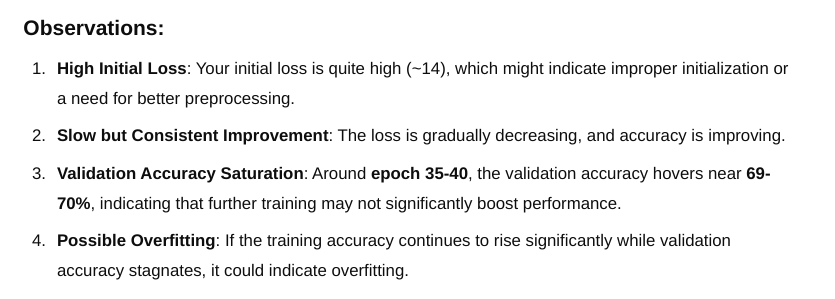